In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM iota''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,IOTA,MIOTA,2017-06-14 23:59:59,0.606196,0.495745,0.592347,0.528916,14194900.0,1.470138e+09
1,2,IOTA,MIOTA,2017-06-15 23:59:59,0.543165,0.300365,0.528284,0.363661,10300400.0,1.010807e+09
2,3,IOTA,MIOTA,2017-06-16 23:59:59,0.448249,0.309852,0.353285,0.410757,6920690.0,1.141712e+09
3,4,IOTA,MIOTA,2017-06-17 23:59:59,0.444205,0.414139,0.426762,0.419906,3100660.0,1.167141e+09
4,5,IOTA,MIOTA,2017-06-18 23:59:59,0.426069,0.393790,0.420597,0.405862,2514450.0,1.128106e+09


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1484 non-null   object 
 1   Symbol      1484 non-null   object 
 2   Date        1484 non-null   object 
 3   High        1484 non-null   float64
 4   Low         1484 non-null   float64
 5   Open        1484 non-null   float64
 6   Close       1484 non-null   float64
 7   Volume      1484 non-null   float64
 8   Marketcap   1484 non-null   float64
 9   Range       1484 non-null   float64
 10  Difference  1484 non-null   float64
dtypes: float64(8), object(3)
memory usage: 127.7+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        1484 non-null   object        
 1   Symbol      1484 non-null   object        
 2   Date        1484 non-null   datetime64[ns]
 3   High        1484 non-null   float64       
 4   Low         1484 non-null   float64       
 5   Open        1484 non-null   float64       
 6   Close       1484 non-null   float64       
 7   Volume      1484 non-null   float64       
 8   Marketcap   1484 non-null   float64       
 9   Range       1484 non-null   float64       
 10  Difference  1484 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 127.7+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,1484.000000,1484.000000,1484.000000,1484.000000,1.484000e+03,1.484000e+03,1484.000000,1484.000000
mean,0.772344,0.681014,0.729461,0.729370,5.672587e+07,2.027295e+09,0.091330,-0.000091
std,0.864056,0.723861,0.798628,0.797611,1.226599e+08,2.216986e+09,0.175704,0.107818
min,0.124736,0.079620,0.110250,0.110195,2.334640e+06,3.062894e+08,0.002836,-1.628550
25%,0.277188,0.260181,0.269682,0.269657,1.006166e+07,7.495212e+08,0.014270,-0.013693
50%,0.393942,0.356185,0.372516,0.373394,1.939756e+07,1.037859e+09,0.031218,-0.000216
75%,0.999924,0.900324,0.964960,0.965021,4.899553e+07,2.682306e+09,0.095361,0.013732
max,5.690020,4.861360,5.371050,5.366330,2.126970e+09,1.491588e+10,2.308480,1.122340


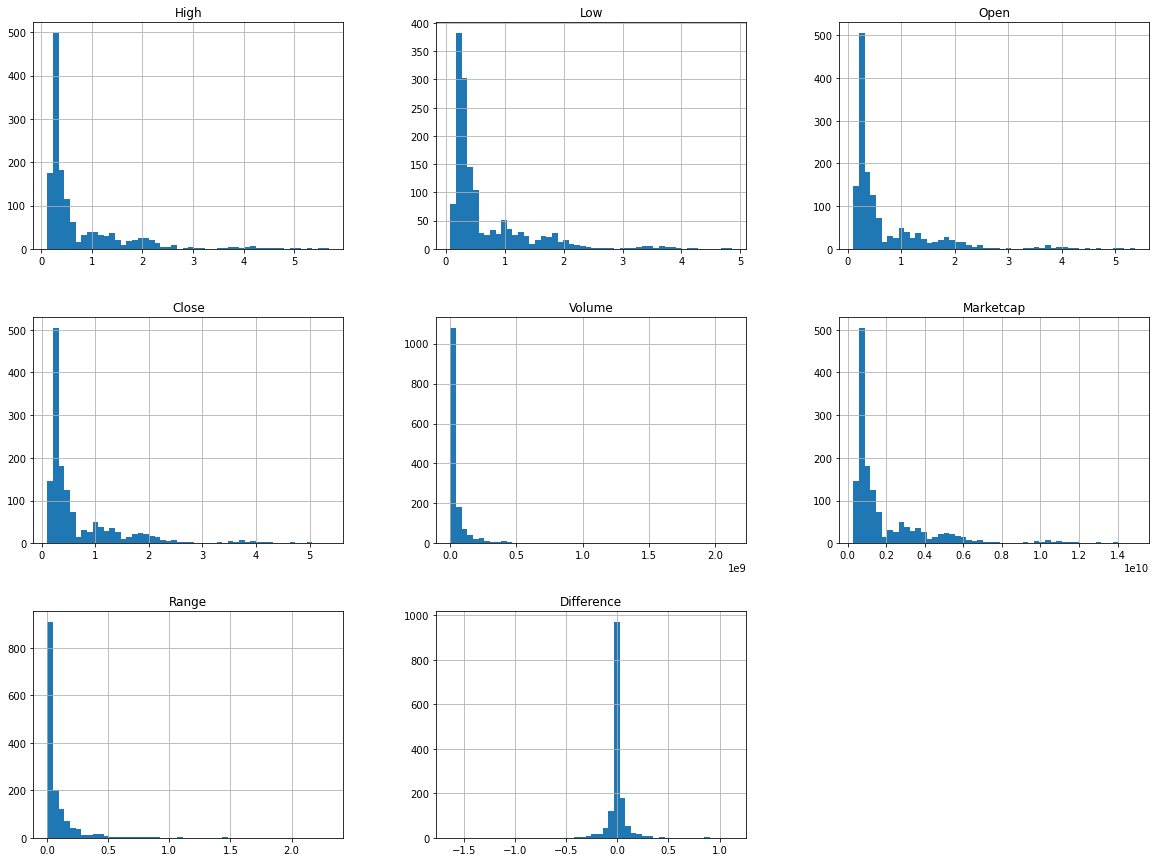

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,191,216,1435,182,179,211,232,230,1428,178
Date,2017-12-22 23:59:59,2018-01-16 23:59:59,2021-05-19 23:59:59,2017-12-13 23:59:59,2017-12-10 23:59:59,2018-01-11 23:59:59,2018-02-01 23:59:59,2018-01-30 23:59:59,2021-05-12 23:59:59,2017-12-09 23:59:59
Difference,-1.62855,-0.8697,-0.750268,-0.62944,-0.52769,-0.40897,-0.40289,-0.36989,-0.366507,-0.36539


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,188,174,173,177,175,167,181,172,201,1412
Date,2017-12-19 23:59:59,2017-12-05 23:59:59,2017-12-04 23:59:59,2017-12-08 23:59:59,2017-12-06 23:59:59,2017-11-28 23:59:59,2017-12-12 23:59:59,2017-12-03 23:59:59,2018-01-01 23:59:59,2021-04-26 23:59:59
Difference,1.12234,1.04243,0.87029,0.86973,0.54436,0.45963,0.45097,0.44096,0.41849,0.351321


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

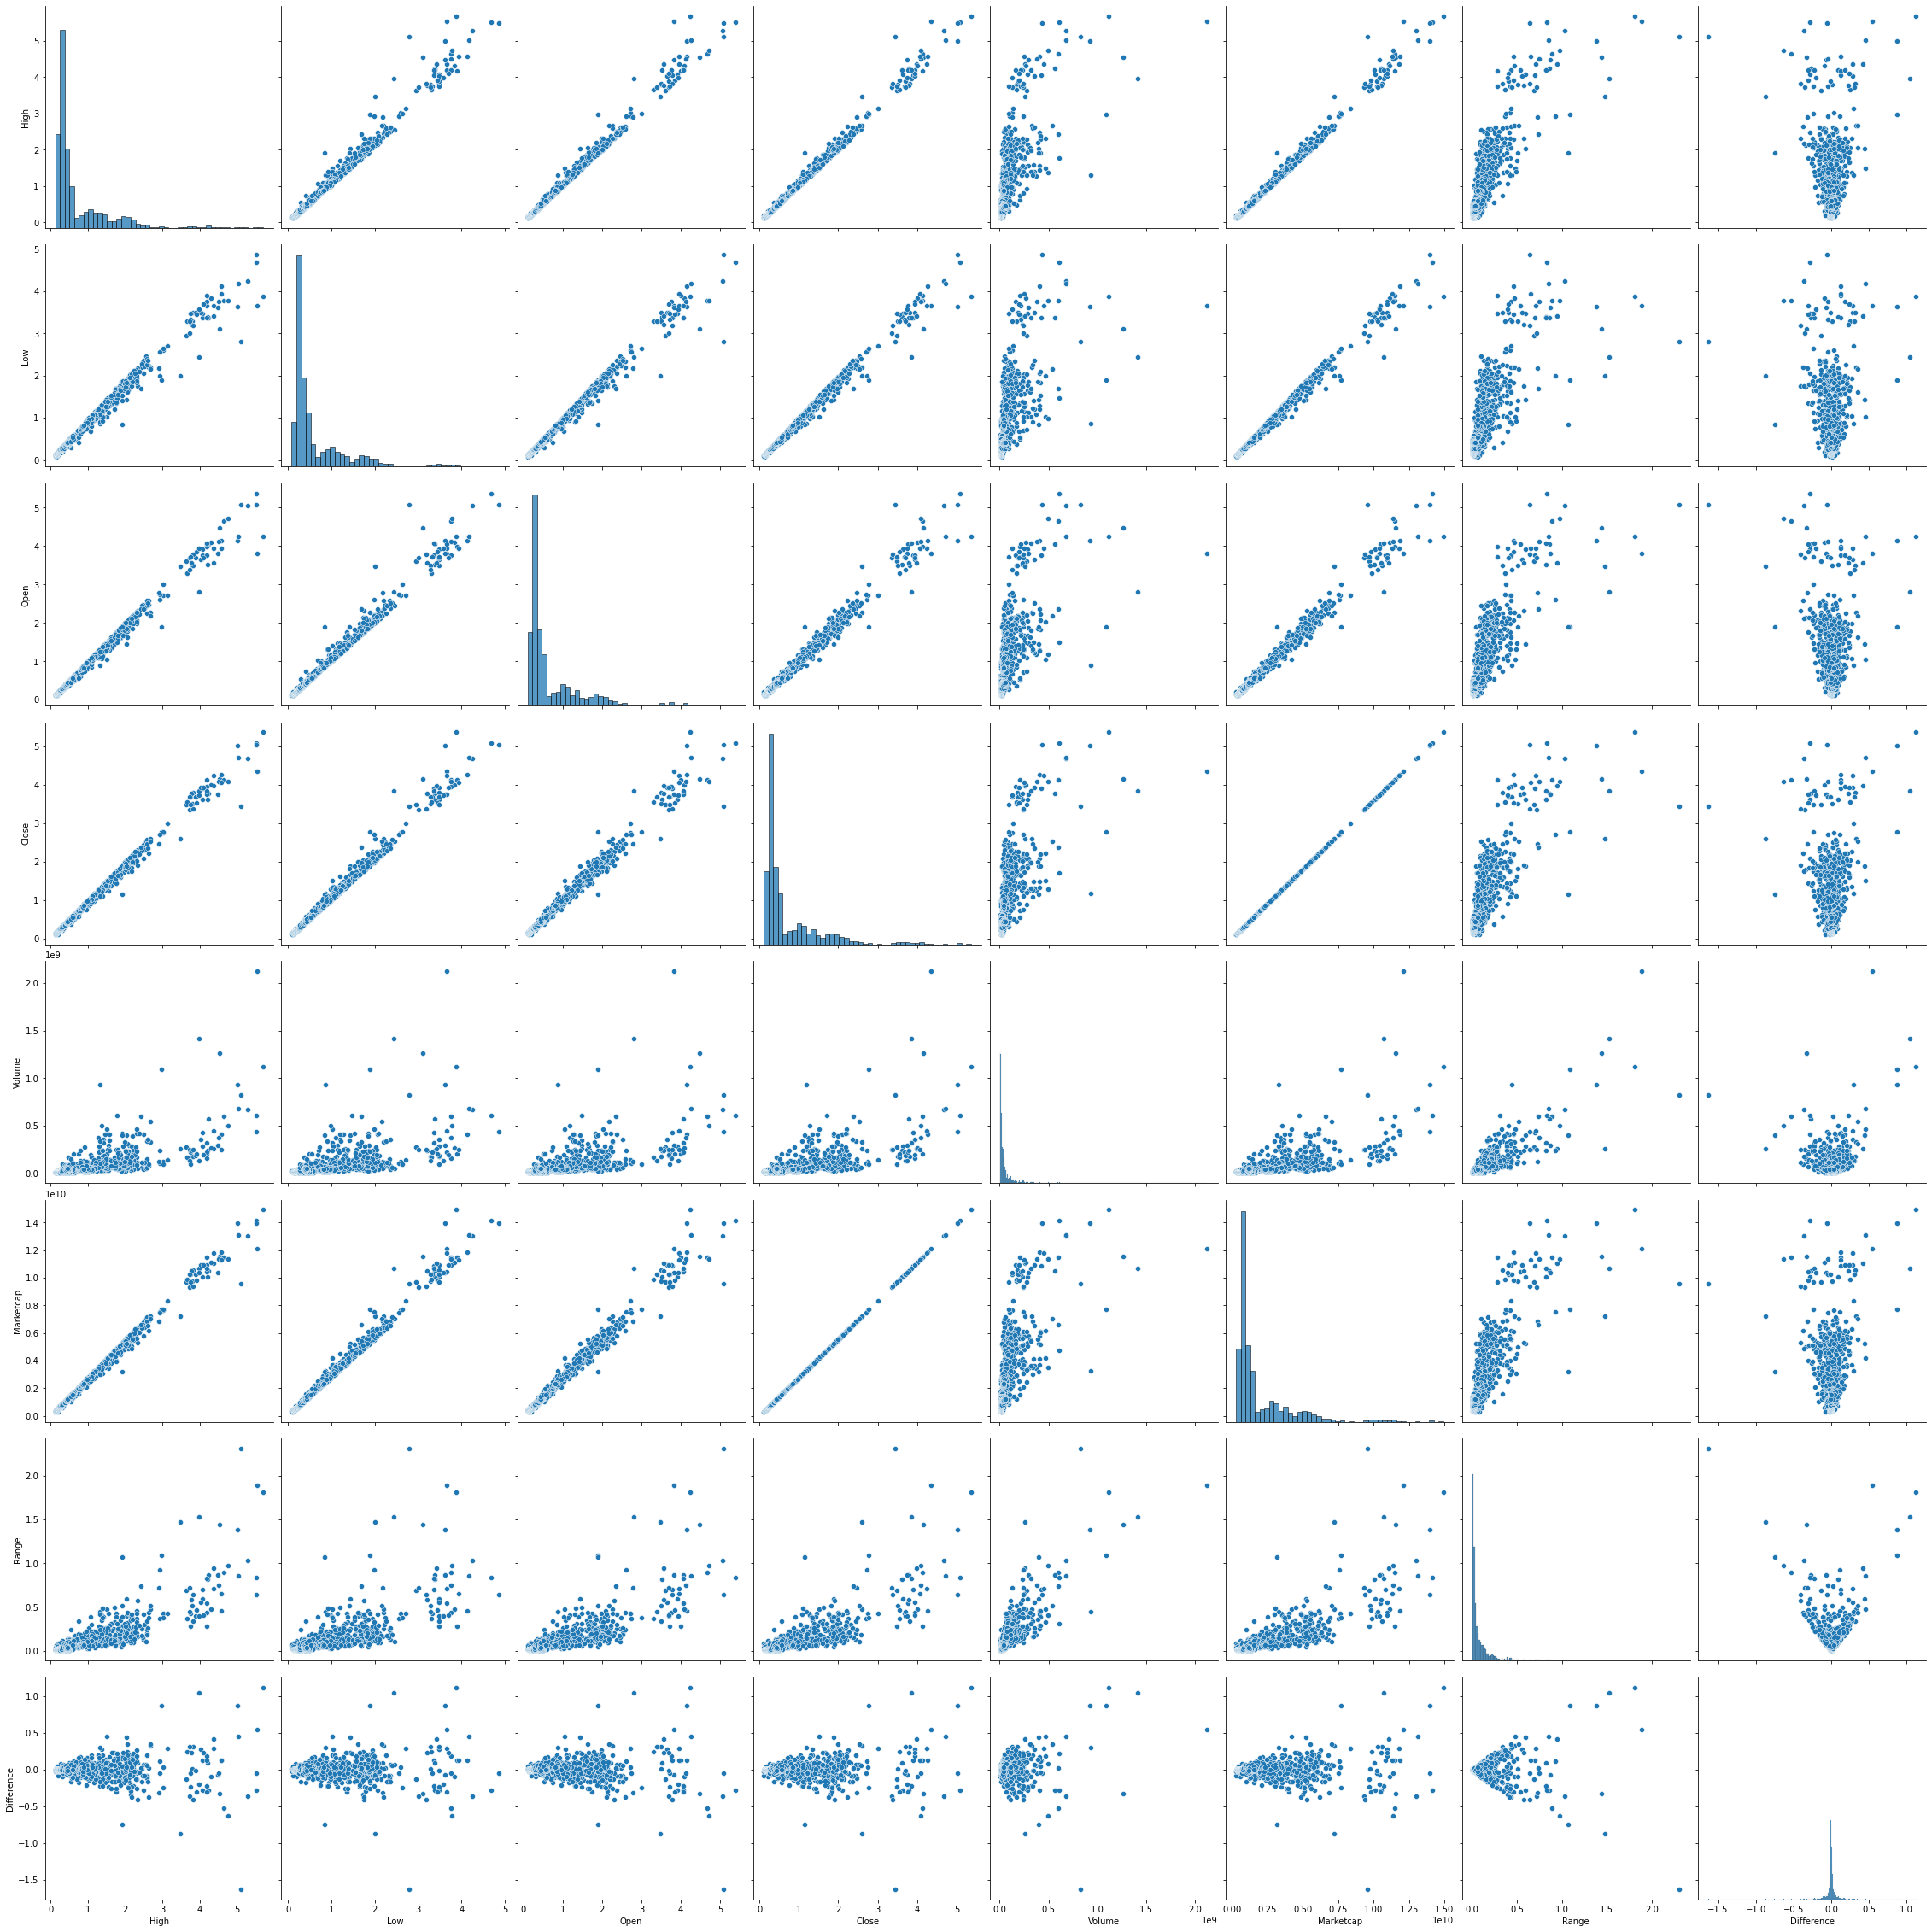

In [15]:
sns.pairplot(data,height=4);
